# Pymaceuticals Inc.
---

### Analysis

My Analysis:

Most Effective Regimens (Lowest Tumor Volume)
- Capomulin and Ramicane show the lowest mean tumor volumes at 40.68 mm³ and 40.22 mm³, respectively, with their median values (41.56 mm³ and 40.67 mm³) closely aligned, indicating consistent performance. These regimens likely have the best effects in reducing tumor growth among all the drugs.

Least Effective Regimens (Highest Tumor Volume)
- Ketapril, Naftisol, and Placebo have the highest mean tumor volumes of 55.24 mm³, 54.33 mm³, and 54.03 mm³, respectively. These regimens may be the least effective in controlling tumor growth, given their higher mean and median tumor volumes.

Variances
- Ketapril and Naftisol show the highest variance (68.19 mm³ and 65.82 mm³, respectively), indicating more variability and less predictable outcomes.

Standard Error of the Mean (SEM)
- Capomulin and Ramicane also have the lowest SEM values (0.33 mm³ and 0.32 mm³, respectively), meaning their results are statistically more reliable. Regimens with higher SEM, such as Ketapril and Naftisol (0.60 mm³ each), suggest greater uncertainty in the precision of their mean tumor volume estimates.

This analysis highlights the superior performance of Capomulin and Ramicane in tumor reduction and their statistical consistency.

Bar chart:
The analysis of the Total Number of Mouse ID/Timepoints per Drug Regimen bar chart reveals the following insights:

- Capomulin and Ramicane have the highest number of observations (200+ rows), indicating that these two drug regimens were tested on more mice or over more timepoints than the others. This could suggest that these regimens were considered more important or effective, thus requiring more data points for deeper analysis.

- Propriva stands out with fewer than 150 rows, making it the least-represented drug regimen in the dataset. This could mean that Propriva was either less effective or perhaps not as thoroughly studied as the other regimens. It may indicate that fewer mice or timepoints were involved in the Propriva regimen's testing.

Pie Chart
- In your distribution of male vs female mice, the output shows that 50.4% of the mice are male and 49.6% are female. This indicates a nearly equal distribution of male and female mice in the study, with just a slight predominance of male mice.

Quartiles, Outliers and Box Plots:
Capomulin, Ramicane, and Ceftamin do not have outliers, however Infubinol does. 
Infubinol:
Potential outlier: 36.32 mm³ (for mouse at index 31).
There is one identified outlier for Infubinol at a tumor volume of 36.32 mm³. This value is significantly lower than the typical range of tumor volumes observed for this regimen. It could indicate that the specific mouse reacted differently to the drug, or there might be experimental variation.

Line chart:
The data from Mouse ID b128 indicates that Capomulin is working effectively in shrinking the tumor volume over time. The downward slope in tumor size from 45 mm³ to 38 mm³ suggests a positive treatment response. Further analysis across multiple mice would be needed to determine if this trend holds consistently across the regimen.

Scatter Plot:
The positive correlation between mouse weight and average tumor volume for the Capomulin regimen suggests that heavier mice tend to have larger tumors even after treatment. This could be due to physiological differences, but it also points to a potential need for weight-adjusted dosing to maximize the drug’s effectiveness across all weight ranges.

Correlation and Regression:
The 0.84 correlation between mouse weight and average tumor volume suggests a strong relationship, indicating that heavier mice tend to have larger tumors, even after treatment with Capomulin. This highlights the potential need for further investigation into the impact of weight on treatment outcomes and the possibility of weight-adjusted dosing strategies.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how='outer')

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# List of duplicate Mouse IDs
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()

# A DataFrame excluding the rows with the duplicate Mouse IDs
clean_data = combined_data.drop(combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)].index)

# Rearranging the columns to match desired output
desired_columns = ["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]
cleaned_data = clean_data[desired_columns]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = cleaned_data["Mouse ID"].nunique()
num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# Group the data by Drug Regimen and calculate summary statistics
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
)

# Display the summary statistics DataFrame
summary_stats


,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Generating summary statistics using the aggregation method
summary_df = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance=lambda x: np.var(x, ddof=0),
    Standard_Deviation="std",
    SEM=st.sem 
)

# Displaying the summary statistics DataFrame
summary_df

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.268188,0.469821
Infubinol,52.884795,51.820584,42.886388,6.567243,0.492236
Ketapril,55.235638,53.698743,68.188930,8.279709,0.603860
Naftisol,54.331565,52.509285,65.817708,8.134708,0.596466
Placebo,54.033581,52.288934,60.830138,7.821003,0.581331
Propriva,52.320930,50.446266,43.555716,6.622085,0.544332
Ramicane,40.216745,40.673236,23.383692,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.710419,0.573111


## Bar and Pie Charts

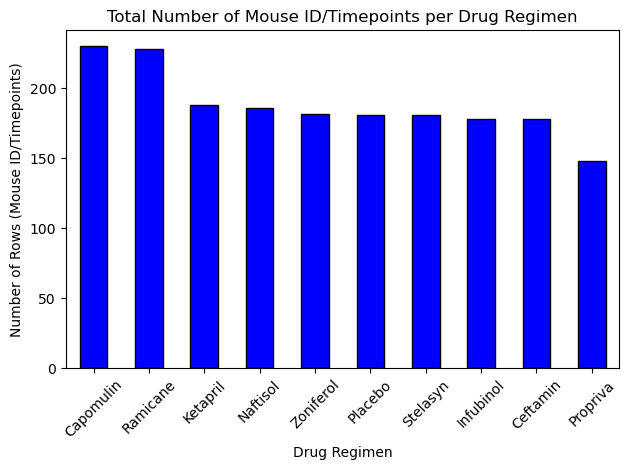

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_count = cleaned_data["Drug Regimen"].value_counts()

# Generate the bar plot
total_count.plot(kind='bar', color='blue', edgecolor='black')

# Add labels and title
plt.title("Total Number of Mouse ID/Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


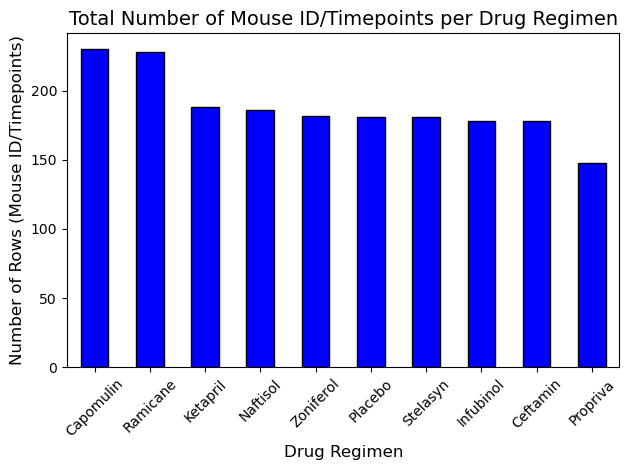

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_count = cleaned_data["Drug Regimen"].value_counts()

# Generate the bar plot using Pandas
total_count.plot(kind='bar', color='blue', edgecolor='black')

# Add labels and title
plt.title("Total Number of Mouse ID/Timepoints per Drug Regimen", fontsize=14)
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("Number of Rows (Mouse ID/Timepoints)", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()



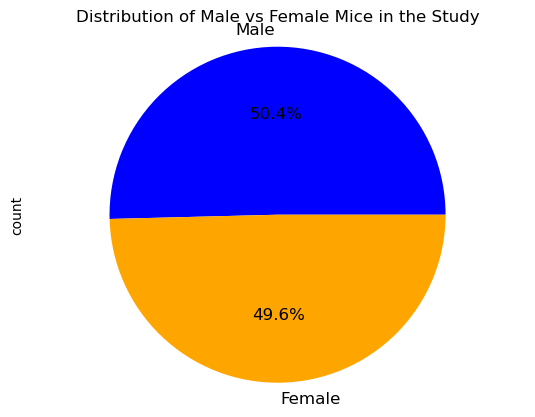

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = cleaned_data.drop_duplicates(subset="Mouse ID")[["Mouse ID", "Sex"]]

# Get the unique mice with their gender
gender_counts = unique_mice["Sex"].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=['blue', 'orange'], 
                   labels=['Male', 'Female'], fontsize=12, legend=False)

plt.title("Distribution of Male vs Female Mice in the Study")

plt.axis('equal')

plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how="left")

# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(treatment_regimens)]

# Display the final tumor volume DataFrame for the four regimens
filtered_final_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


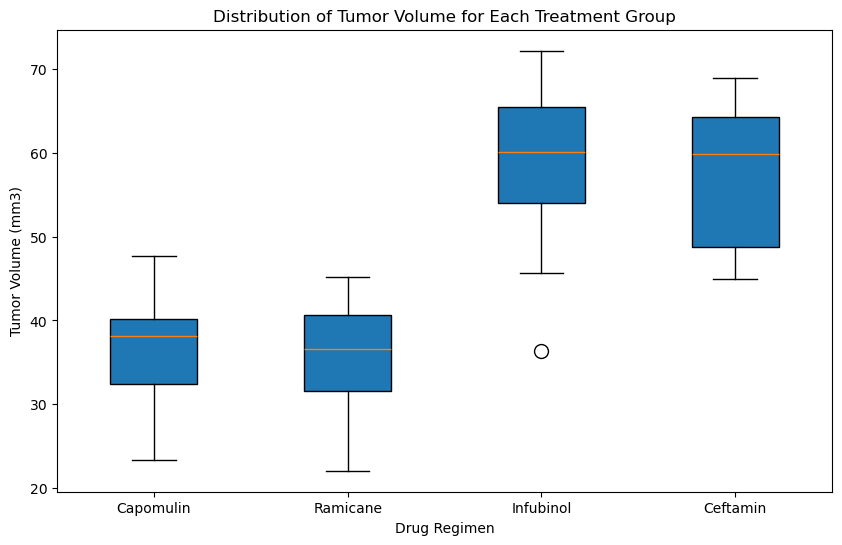

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in treatment_regimens:
    # Subset the data for each regimen
    subset = filtered_final_tumor_volume.loc[filtered_final_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    tumor_vol_data.append(subset)
    
    # Calculate IQR
    quartiles = subset.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Calculate potential outliers using 1.5*IQR rule
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    print(f"{regimen} potential outliers: {outliers}")

# Generate the box plot
plt.figure(figsize=(10, 6))

# Plot the data in a boxplot, with showfliers=True to ensure all outliers are displayed
box = plt.boxplot(tumor_vol_data, labels=treatment_regimens, patch_artist=True, flierprops=dict(marker='o', color='red', markersize=10))

# Add labels and title
plt.title("Distribution of Tumor Volume for Each Treatment Group")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")

plt.show()

## Line and Scatter Plots

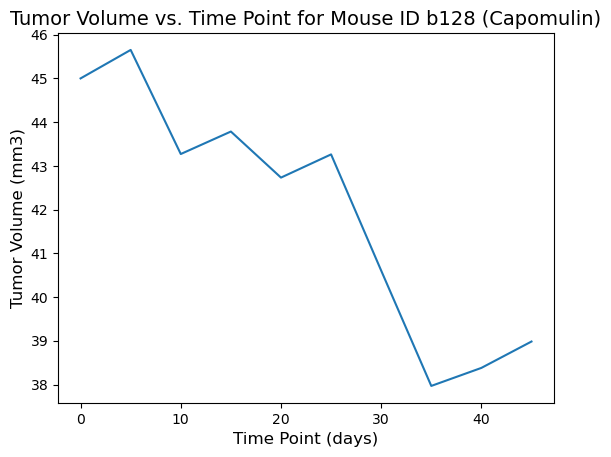

In [14]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter data for a single mouse treated with Capomulin
# Select a specific mouse ID 
mouse_id = 'b128' 

# Subset the data for the selected mouse ID under Capomulin regimen
capomulin_data = combined_data[(combined_data['Drug Regimen'] == 'Capomulin') & (combined_data['Mouse ID'] == mouse_id)]

# Plotting the tumor volume vs. time point
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])

# Adding labels and title
plt.title(f"Tumor Volume vs. Time Point for Mouse ID {mouse_id} (Capomulin)", fontsize=14)
plt.xlabel("Time Point (days)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)

plt.show()


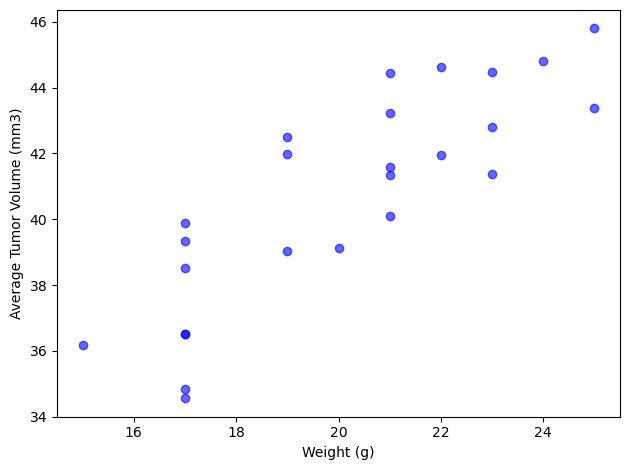

In [15]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()

# Merge with mouse metadata to get weights
mouse_metadata_capomulin = capomulin_data[["Mouse ID", "Weight (g)"]].drop_duplicates()
scatter_data = pd.merge(average_tumor_volume, mouse_metadata_capomulin, on="Mouse ID")

# Generate the scatter plot
plt.scatter(scatter_data["Weight (g)"], scatter_data["Tumor Volume (mm3)"], color='blue', alpha=0.6)

# Customize the plot
plt.xlabel("Weight (g)", fontsize=10)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=10)

plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


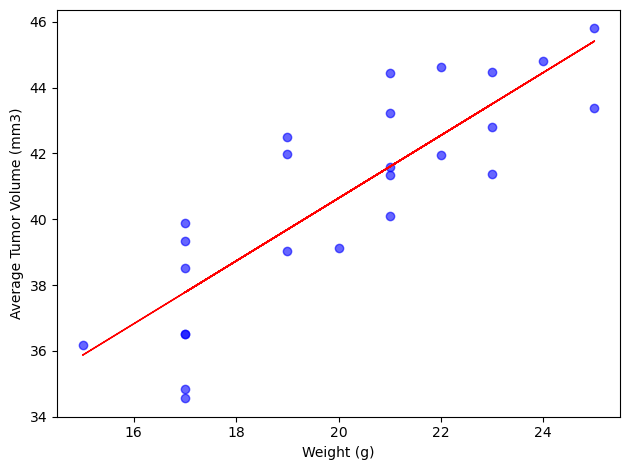

In [16]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()

# Merge with mouse metadata to get weights
mouse_metadata_capomulin = capomulin_data[["Mouse ID", "Weight (g)"]].drop_duplicates()
scatter_data = pd.merge(average_tumor_volume, mouse_metadata_capomulin, on="Mouse ID")

# Calculate the correlation coefficient
correlation = st.pearsonr(scatter_data["Weight (g)"], scatter_data["Tumor Volume (mm3)"])
correlation_coefficient = correlation[0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(scatter_data["Weight (g)"], scatter_data["Tumor Volume (mm3)"])

# Create the linear regression line
regression_line = intercept + slope * scatter_data["Weight (g)"]

# Generate the scatter plot
plt.scatter(scatter_data["Weight (g)"], scatter_data["Tumor Volume (mm3)"], color='blue', alpha=0.6)
plt.plot(scatter_data["Weight (g)"], regression_line, color='red', linewidth=1)

# Customize the plot
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")
plt.xlabel("Weight (g)", fontsize=10)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=10)

plt.tight_layout()
plt.show()